In [1]:
import pandas as pd
import sqlite3

## Подключение к базе данных

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite', check_same_thread=False)

## График просмотров и коммитов
- analyze only the users and not the admins
- analyze only the dates when there were both views and checker commits
- use size of the font should be 8
- the size of the figure is (15,8)

### Анализируйте только пользователей, а не администраторов

In [3]:
query = """
SELECT *
FROM
    pageviews
WHERE uid LIKE 'user_%'
"""

pageview = pd.io.sql.read_sql(query, conn, parse_dates='datetime')
pageview

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [4]:
pageview = pageview.groupby(by = pageview['datetime'].dt.date).agg({'uid':['count']})
pageview = pageview.reset_index()
pageview.columns= ['date', 'views']
pageview

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


In [5]:
query = """
SELECT *
FROM 
    checker
WHERE uid LIKE 'user_%'
"""

checker = pd.io.sql.read_sql(query, conn, parse_dates='timestamp')
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [6]:
checker = checker.groupby(by = checker['timestamp'].dt.date).agg({'uid': ['count']})
checker = checker.reset_index()
checker.columns = ['date', 'commits']
checker

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25
5,2020-04-22,28
6,2020-04-23,43
7,2020-04-24,16
8,2020-04-25,104
9,2020-04-26,261


### Анализировать только даты, когда были и просмотры, и проверки коммитов

In [7]:
df = pd.merge(pageview, checker, on='date',how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     32 non-null     object
 1   views    32 non-null     int64 
 2   commits  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


### График

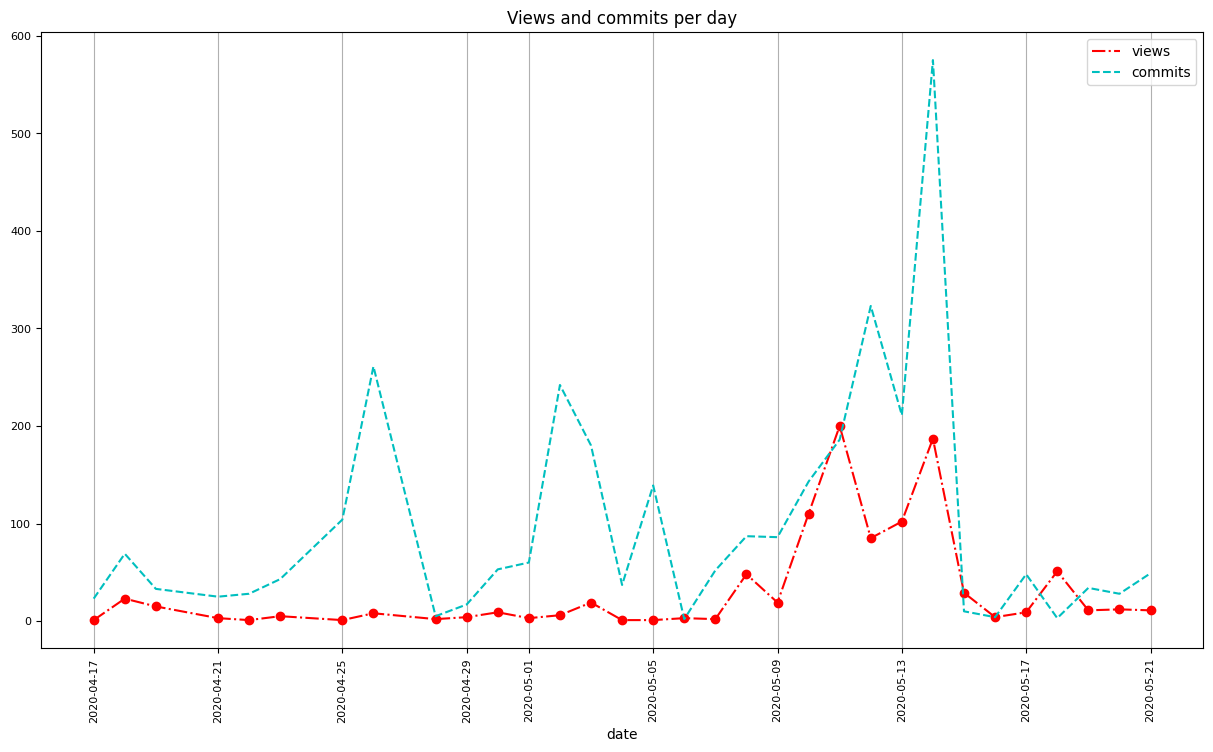

In [8]:
plt = df.plot(x='date',
              y=['views', 'commits'],
              figsize=(15,8),
             fontsize=8,
             title='Views and commits per day',
             rot=90,
             style=['-.', '--'],
             color=['r','c'])
plt.get_lines()[0].set_marker('o')
plt.grid(axis='x')

## «Сколько раз количество просмотров превышало 150?»

In [9]:
print(f"Answer: {(df[df['views'] > 150]['views']).count()}")

Answer: 2


## Закрыть соединение с базой данных

In [10]:
conn.close()